In [164]:
import pandas as pd
import numpy as np

In [165]:
pip install tensorflow

In [166]:
dataset = pd.read_csv('/content/BTC-01.csv')

In [167]:
pd.set_option('display.max_columns',None)

In [168]:
pd.set_option('display.max_rows',None)
print(dataset)

            Date          Open          High           Low         Close
0     01-01-2019   3746.713379   3850.913818   3707.231201   3843.520020
1     02-01-2019   3849.216309   3947.981201   3817.409424   3943.409424
2     03-01-2019   3931.048584   3935.685059   3826.222900   3836.741211
3     04-01-2019   3832.040039   3865.934570   3783.853760   3857.717529
4     05-01-2019   3851.973877   3904.903076   3836.900146   3845.194580
5     06-01-2019   3836.519043   4093.297363   3826.513184   4076.632568
6     07-01-2019   4078.584961   4092.613525   4020.894043   4025.248291
7     08-01-2019   4028.472168   4109.020996   3996.955322   4030.847900
8     09-01-2019   4031.552002   4068.403564   4022.662842   4035.296387
9     10-01-2019   4034.411377   4064.066650   3659.174561   3678.924561
10    11-01-2019   3674.015381   3713.881836   3653.069824   3687.365479
11    12-01-2019   3686.973145   3698.978271   3653.810791   3661.301025
12    13-01-2019   3658.868164   3674.760010   3544

In [169]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [170]:
pip install --upgrade pip


In [171]:
print('Total number of days present in the dataset: ',dataset.shape[0])
print('Total number of fields present in the dataset: ',dataset.shape[1])

Total number of days present in the dataset:  1944
Total number of fields present in the dataset:  5


In [172]:
dataset.shape

(1944, 5)

In [173]:
dataset.head()

,Date,Open,High,Low,Close
0,01-01-2019,3746.713379,3850.913818,3707.231201,3843.520020
1,02-01-2019,3849.216309,3947.981201,3817.409424,3943.409424
2,03-01-2019,3931.048584,3935.685059,3826.222900,3836.741211
3,04-01-2019,3832.040039,3865.934570,3783.853760,3857.717529
4,05-01-2019,3851.973877,3904.903076,3836.900146,3845.194580


In [174]:
dataset.tail()

,Date,Open,High,Low,Close
1939,23-04-2024,66839.89063,67199.24219,65864.86719,66407.27344
1940,24-04-2024,66408.71875,67075.36719,63589.87109,64276.89844
1941,25-04-2024,64275.01953,65275.20703,62783.63281,64481.70703
1942,26-04-2024,64485.37109,64789.65625,63322.39844,63755.32031
1943,27-04-2024,63753.12109,63885.76953,62581.51563,62694.92188


In [175]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1944 non-null   object 
 1   Open    1944 non-null   float64
 2   High    1944 non-null   float64
 3   Low     1944 non-null   float64
 4   Close   1944 non-null   float64
dtypes: float64(4), object(1)
memory usage: 76.1+ KB


In [176]:
dataset.describe()

,Open,High,Low,Close
count,1944.000000,1944.000000,1944.000000,1944.000000
mean,26500.570608,27103.352350,25858.945406,26528.826116
std,17541.521901,17980.885063,17038.897905,17549.776789
min,3401.376465,3427.945557,3391.023682,3399.471680
25%,9932.517334,10178.585692,9726.858399,9947.247315
50%,23591.367185,24116.056640,23118.168945,23635.012695
75%,39672.124023,40617.620120,38663.493165,39703.016600
max,73079.375000,73750.070310,71334.093750,73083.500000


In [177]:
print('Null Values:',dataset.isnull().values.sum())

Null Values: 0


In [178]:
print('NA values:',dataset.isnull().values.any())


NA values: False


In [179]:
dataset.shape

(1944, 5)

In [180]:
sd=dataset.iloc[0][0]
ed=dataset.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 01-01-2019
Ending Date 27-04-2024


In [181]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')



In [182]:
#Building LSTM Model
# Lets First Take all the Close Price
closedf = dataset[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1944, 2)


In [183]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of BTC close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [184]:
closedf = closedf[closedf['Date'] > '2019-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1943


In [185]:
closedf

,Date,Close
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580
5,2019-01-06,4076.632568
6,2019-01-07,4025.248291
7,2019-01-08,4030.847900
8,2019-01-09,4035.296387
9,2019-01-10,3678.924561
10,2019-01-11,3687.365479


In [186]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict BTC close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [187]:

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1943, 1)


In [188]:
# we keep the training set as 90% and 10% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1554, 1)
test_data:  (389, 1)


In [189]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [190]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1538, 15)
y_train:  (1538,)
X_test:  (373, 15)
y_test (373,)


In [191]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1538, 15, 1)
X_test:  (373, 15, 1)


In [192]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [193]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
49/49 [==============================] - 2s 13ms/step - loss: 0.0500 - val_loss: 0.0120
Epoch 2/100
49/49 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 3/100
49/49 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0083
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 5/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 7/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/100
49/49 [==============================] - 0s 9ms/step - loss: 9.5700e-04 - val_loss: 0.001

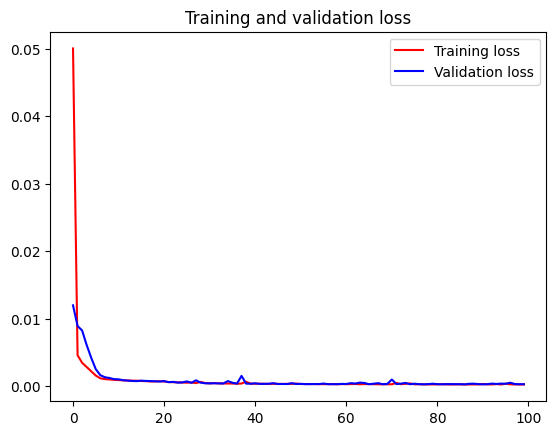

<Figure size 640x480 with 0 Axes>

In [194]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [195]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

12/12 [==============================] - 0s 3ms/step


((1538, 1), (373, 1))

In [196]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [197]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1125.8822423713166
Train data MSE:  1267610.8236870642
Train data MAE:  678.6458935692151
-------------------------------------------------------------------------------------
Test data RMSE:  1237.181357028103
Test data MSE:  1530617.7101778986
Test data MAE:  782.6594388371315


In [198]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9956400207721776
Test data explained variance regression score: 0.9923708129133246


In [199]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9956159568336693
Test data R2 score: 0.9923213145266392


In [200]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0016800662493296611
Test data MGD:  0.0006677721298017481
----------------------------------------------------------------------
Train data MPD:  36.9306768725727
Test data MPD:  30.164275090176492


In [201]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1943, 1)
Test predicted data:  (1943, 1)


In [202]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [203]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [204]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [205]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing BTC price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()